In [4]:
# 1. Importing the required libraries

!pip install pandas openpyxl
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings

In [5]:
# 2. Load the dataset

data = pd.read_csv(r'/Users/elnazshahzeidi/Desktop/Ironhack/Final Project/Amazon Sale Report.csv')
data.head()

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_24725/344931396.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'/Users/elnazshahzeidi/Desktop/Ironhack/Final Project/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [6]:
# 3. Data cleaning

data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [7]:
# 3.1 Convert 'Date' column to datetime format

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_24725/2109915939.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [8]:
# 3.2 Handle the missing values

data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [9]:
# Drop columns with high missing values or irrelevant columns

columns_to_drop = ['promotion-ids', 'Unnamed: 22', 'fulfilled-by']
data_cleaned = data.drop(columns=columns_to_drop)


In [10]:
# Drop rows with missing target variable (Amount)

data_cleaned = data_cleaned.dropna(subset=['Amount'])


In [11]:
# Drop rows with missing values in essential shipping-related columns

data_cleaned = data_cleaned.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'])

# Fill missing values in 'Courier Status' with a placeholder
data_cleaned['Courier Status'].fillna('Unknown', inplace=True)

In [12]:
# 3.3 Extract year and month from the 'Date' column

data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month


In [13]:
# 4. EDA
# 4.1 Plot the distribution of categorical features

# for col in data_cleaned.select_dtypes(include='object').columns:
#     sns.countplot(x= categorical[col])
#     plt.show()


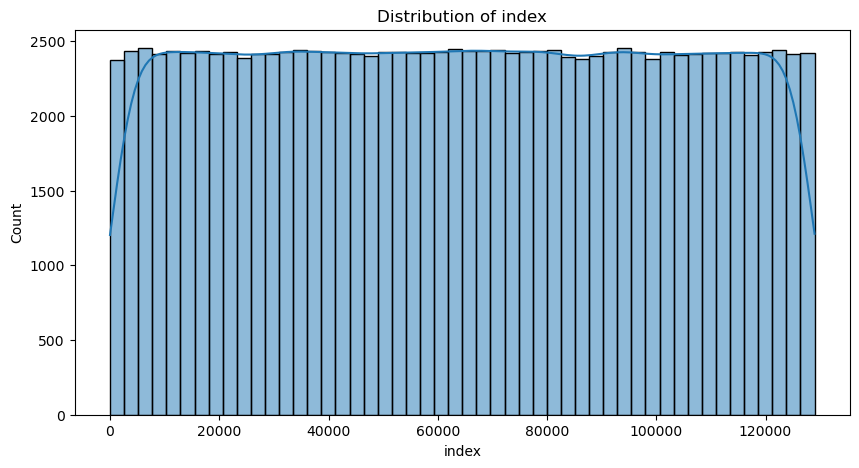

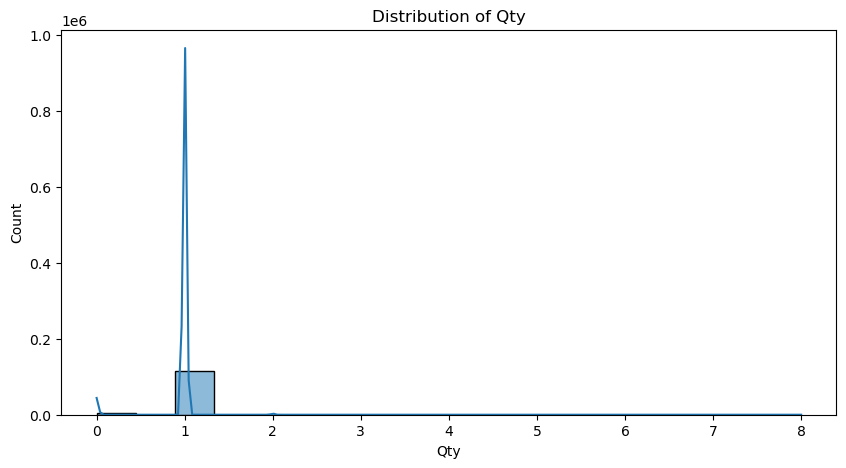

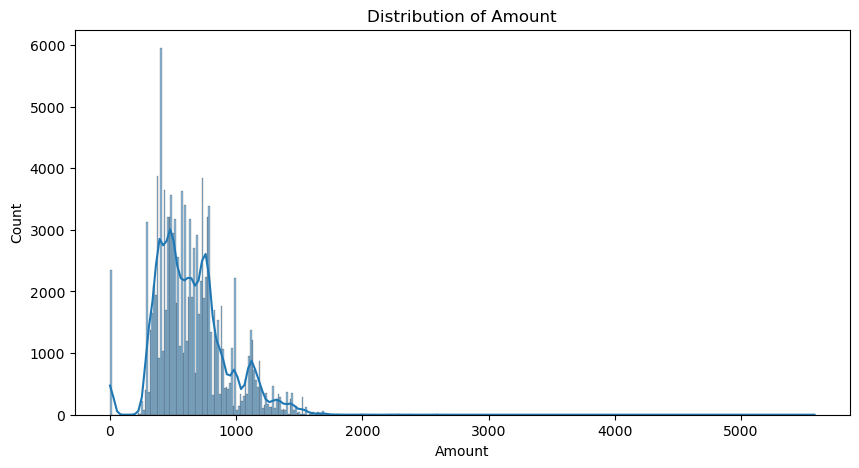

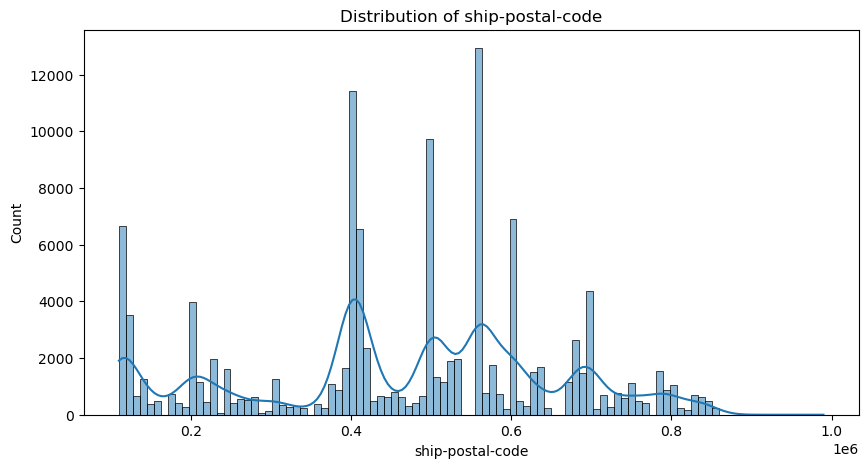

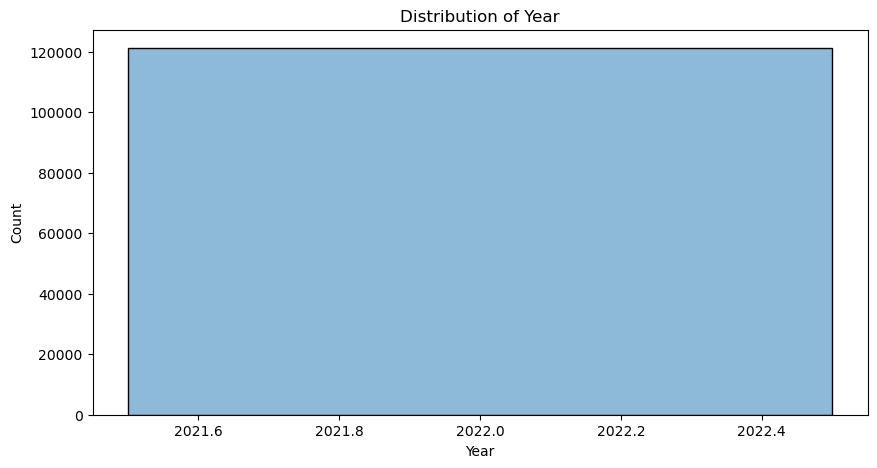

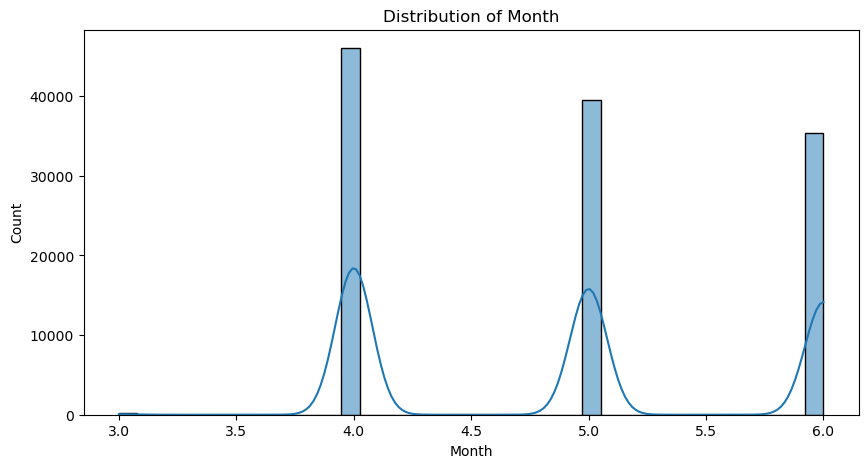

In [14]:
# 4.2 Plot histograms for numerical features

for col in data_cleaned.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [15]:
# 4.3 Numerical Features Correlation 

# Select only numeric columns for correlation
numeric_df = data_cleaned.select_dtypes(include=['number'])

correlations_matrix = numeric_df.corr()


correlations_matrix["Amount"].sort_values(ascending = False)


Amount              1.000000
Qty                 0.066820
Month               0.053905
index               0.047546
ship-postal-code   -0.038195
Year                     NaN
Name: Amount, dtype: float64

## Interpretation and Next Steps

The EDA reveals that most features have weak linear correlations with "Amount," which suggests that linear models may struggle to capture the underlying relationships in the data. However, since Random Forest is a non-linear ensemble method, it has the capability to capture complex interactions and non-linear relationships between features. Based on this, we plan to apply a Random Forest model in our predictive analysis, as it may perform well even with weak linear correlations. This approach will allow us to leverage potential non-linear patterns and feature interactions that are not apparent from simple correlation analysis.


In [16]:
# 4.4 Box plots of numerical variables by categories
# for cat_col in data_cleaned.select_dtypes(include='object').columns:
#     for num_col in data_cleaned.select_dtypes(include='number').columns:
#         plt.figure(figsize=(10, 5))
#         sns.boxplot(data=data_cleaned, x=cat_col, y=num_col)
#         plt.title(f'{num_col} by {cat_col}')
#         plt.xticks(rotation=45)
#         plt.show()

In [17]:
# 4.5 Correlation amongst features - Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for VIF calculation
numeric_data = data_cleaned.select_dtypes(include=[float, int])


vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

print(vif_data)

            Feature         VIF
0             index    7.976421
1               Qty    1.004819
2            Amount    1.008862
3  ship-postal-code    1.001584
4              Year  185.645713
5             Month    7.981118


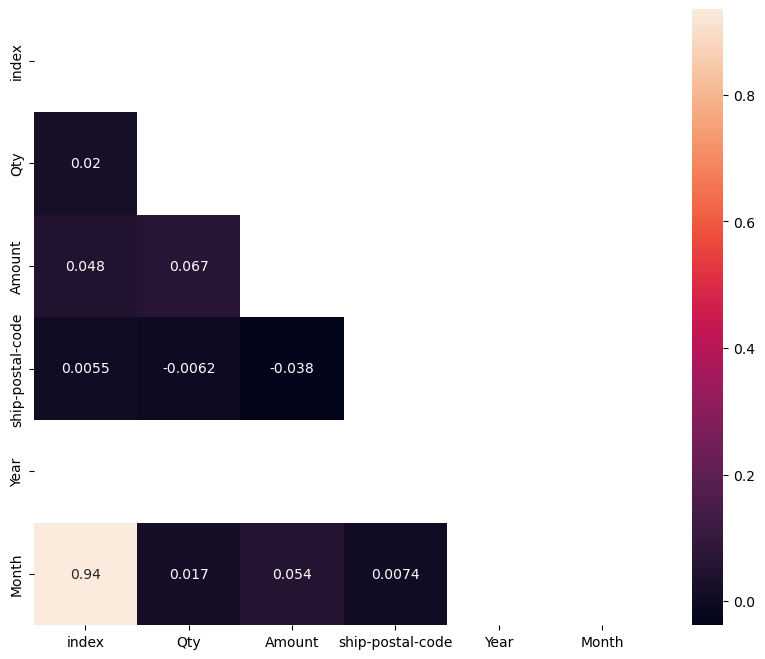

In [18]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

## Multicollinearity Assessment and Key Findings

To assess multicollinearity, we calculated the Variance Inflation Factor (VIF) for each numeric feature. A VIF below 5 generally indicates acceptable multicollinearity, while values above 5 suggest high multicollinearity, and values above 10 indicate severe multicollinearity, which could hinder model performance. Our analysis showed that some features, such as "index", "status", and "month", have VIF values above 5, indicating high multicollinearity. Additionally, "fulfillment", "ship service level", and "year" have VIF values greater than 10, suggesting severe multicollinearity. These features may require transformation, removal, or dimensionality reduction to improve model stability and interpretability. Features with lower VIF values are generally manageable as they are.


In [19]:
# 5. Encode categorical variables

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 
                       'Style', 'Category', 'Size', 'Courier Status', 'ship-country']
for column in categorical_columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column].astype(str))



In [20]:
# 6. Define target variable and feature set

target = 'Amount'
features = data_cleaned.drop(columns=['Amount','index','Order ID', 'Date', 'SKU', 'currency', 'ASIN', 'ship-city', 'ship-state'])



X = features  # Feature set
y = data_cleaned['Amount']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-postal-code,ship-country,B2B,Year,Month
120642,3,0,0,0,772,8,8,0,1,411022.0,0,False,2022,6
40934,10,1,0,1,1162,5,0,0,1,400066.0,0,False,2022,4
32258,3,0,0,0,760,6,6,0,1,560033.0,0,False,2022,4
68194,5,1,0,1,372,7,0,0,1,411014.0,0,False,2022,5
91135,3,0,0,0,1318,5,8,0,1,122001.0,0,False,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117406,3,0,0,0,699,8,8,0,1,411014.0,0,False,2022,6
127616,5,1,0,1,356,8,8,0,1,160043.0,0,False,2022,6
110409,5,1,0,1,1286,5,5,0,1,689101.0,0,False,2022,6
922,3,0,0,0,395,5,0,0,1,734013.0,0,False,2022,4


In [21]:
# 7. Normalization

scaler = StandardScaler()
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# 8. Training the Model( Linear Regression)

lm = LinearRegression()

lm.fit(X_train_scaled, y_train)

predictions = lm.predict(X_test_scaled)

In [23]:
# 9. Model Validation

r2 = round(r2_score(y_test, predictions), 2)
print(f'Rounded R^2 score: {r2}')


rmse = round(mean_squared_error(y_test, predictions, squared=False), 2)
print(f'Rounded RMSE: {rmse}')


mae = round(mean_absolute_error(y_test, predictions), 2)
print(f'Rounded MAE: {mae}')

Rounded R^2 score: 0.26
Rounded RMSE: 241.33
Rounded MAE: 178.68


/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: xlabel='Amount'>

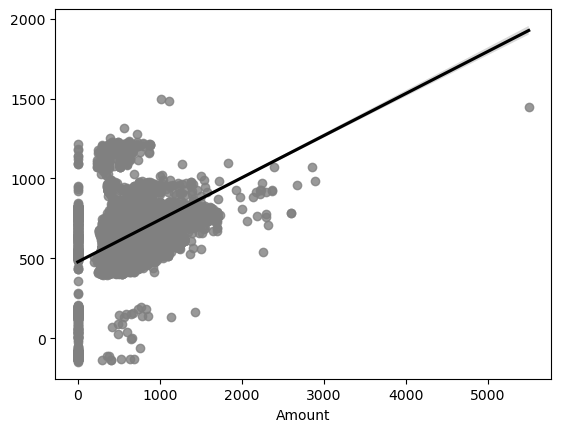

In [24]:
sns.regplot(x=y_test, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})

## Model Evaluation Summary

The model shows an R² score of 0.26, meaning it explains only 26% of the target variance, suggesting a poor fit. The RMSE of 241.33 and MAE of 178.68 indicate the average prediction errors, with RMSE reflecting a typical error of about 241 units. 
The scatter plot shows predicted vs. actual values, with a black regression line. The spread of points around this line suggests potential for model improvement.

In [25]:
# 10. Improving the linear model-Log sacaling

y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)


In [33]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
r2 = round(r2_score(y_test_scaled, predictions), 2)
mae = round(mean_absolute_error(y_test_scaled, predictions), 2)
rmse = round(np.sqrt(mean_squared_error(y_test_scaled, predictions)), 2)

print("R2_score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R2_score: 0.31
MAE: 0.35
RMSE: 0.8


<Axes: xlabel='Amount'>

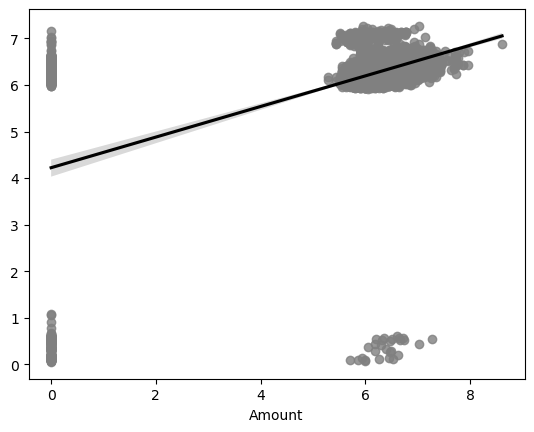

In [27]:
sns.regplot(x=y_test_scaled, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})

## Result of improvment:

To improve the model, log scaling was applied. This resulted in a slight increase in the R² score, though the improvement was minimal.


In [34]:
# 11. Random Forest Regression Model
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2)
rf_r2 = r2_score(y_test, y_pred_rf)


print("Random Forest Results:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R2):", rf_r2)

Random Forest Results:
Mean Absolute Error (MAE): 38.79070752118933
Root Mean Squared Error (RMSE): 117.59
R-squared (R2): 0.8244356900827804


In [29]:
# 12.cross-validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)


cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")

Cross-validated R² scores: [0.82963595 0.83386146 0.81776383 0.80346084 0.80706275]
Mean R² score: 0.8183569653211334


<Axes: xlabel='Amount'>

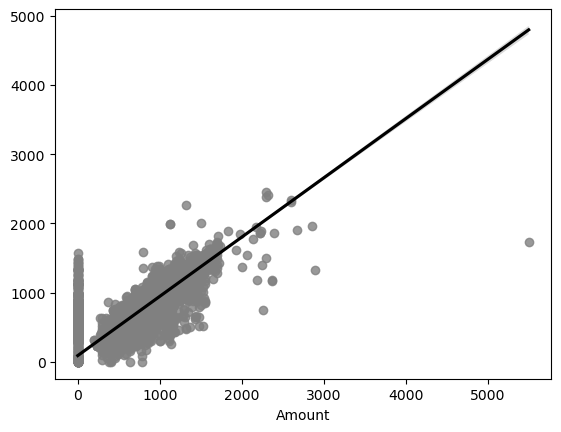

In [30]:
sns.regplot(x=y_test, y=y_pred_rf, line_kws={"color": "black"}, scatter_kws={"color": "grey"})

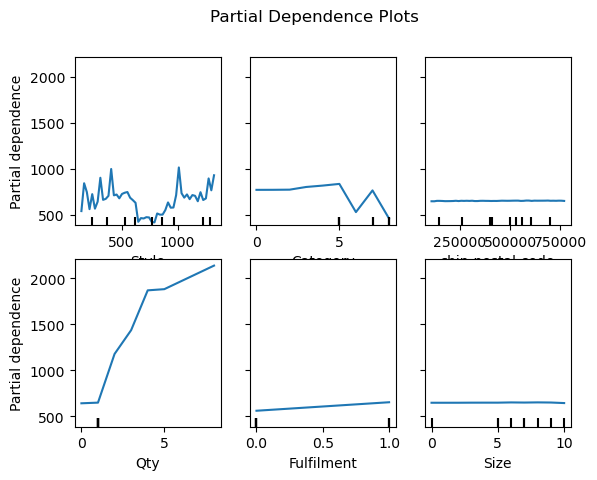

In [31]:
# EDA / Partial Dependence Plots (PDP)

from sklearn.inspection import PartialDependenceDisplay

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': random_forest_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Plot partial dependence for top features
top_features = feature_importance['Feature'].head(6)  # Select top 3 features for example
PartialDependenceDisplay.from_estimator(random_forest_regressor, X_train, features=top_features, grid_resolution=50)
plt.suptitle('Partial Dependence Plots')
plt.show()

##  PDP Interpretation

The Partial Dependence Plots (PDP) illustrate how the top features affect the target variable. 

The PDP for Qty shows an expected positive trend: as the quantity of items increases, the predicted transaction amount also rises.

Meanwhile, the plots for Style exhibit some variability, suggesting a more complex, non-linear relationship with the target. Other features, like Category and Ship Postal Code, show minimal impact in the PDPs, reinforcing the idea from the feature importance analysis that these features might not be as critical for prediction.


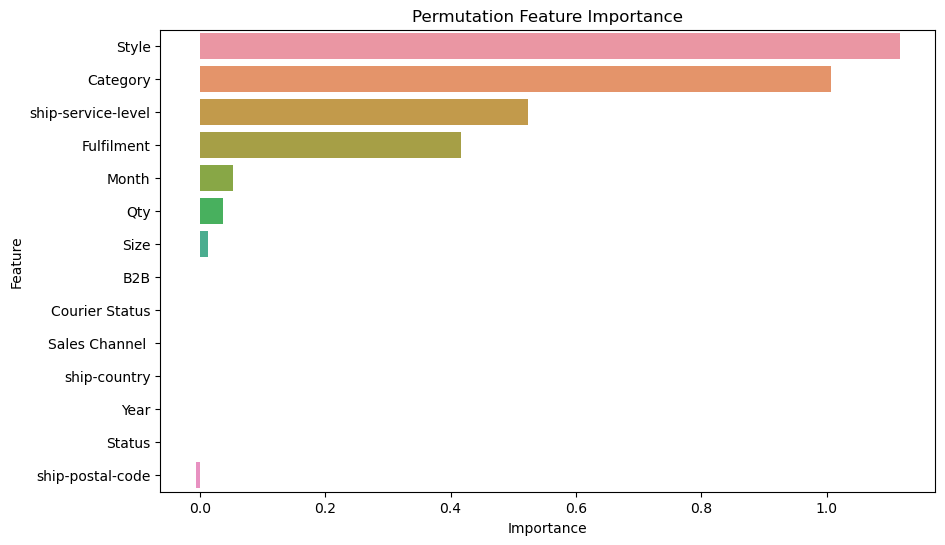

In [32]:
# Feature Importance (Built-In or Permutation)

from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
perm_importance = permutation_importance(random_forest_regressor, X_test, y_test, n_repeats=10, random_state=42)

# Convert to a DataFrame for plotting
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_importance_df, x='Importance', y='Feature')
plt.title('Permutation Feature Importance')
plt.show()


## Feature Importance  Interpretation

The Feature Importance plot reveals that Style and Category are the most influential features in predicting the target variable (likely "Amount" in this e-commerce context). These features contribute significantly to the model's predictions, suggesting that variations in product style and category have a meaningful impact on transaction amounts. Following these, Ship Service Level and Fulfillment also have moderate importance, indicating that factors related to delivery options and fulfillment status might slightly influence the prediction.

# conclusion

The Random Forest model’s predictions are primarily driven by Style and Category, with Qty having a clear positive effect. 

Features with low importance, such as Status and Ship Postal Code, appear to contribute little to the model’s accuracy and may be considered for removal or simplification in future modeling efforts. 

These insights help confirm which features are most relevant to the model, supporting a more interpretable and efficient predictive approach.



# Overall Conclusion

In this analysis, we developed and evaluated two machine learning models—Linear Regression and Random Forest—to predict the target variable, "Amount." Our initial model, Linear Regression, yielded unsatisfactory results, even after attempts to improve its performance. This prompted us to explore the Random Forest model, which ultimately provided more reliable and accurate predictions.

To gain deeper insights into our models and data, we conducted Exploratory Data Analysis (EDA) for both approaches. Through EDA and model interpretation, we identified key predictors and evaluated feature importance. The EDA for Random Forest revealed that Style and Category are the primary drivers of the target variable, with Qty showing a clear positive effect on predicted values. Conversely, features with low importance, such as Status and Ship Postal Code, contribute minimally to the model’s accuracy and may be candidates for removal or simplification in future iterations.

In conclusion, the Random Forest model provided a robust and interpretable predictive approach, confirming that Style, Category, and Qty are the most influential features. These insights not only enhance our understanding of the factors affecting "Amount" but also provide a foundation for refining the model to achieve greater efficiency and interpretability in future applications.